In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re
import json

In [20]:
def get_stats(config_dir, id):
    # Get the files in the logging directory
    files = os.listdir(config_dir)
    # Sort the files 
    files = sorted(files, key=lambda x: int(x.split('_')[0]))
    metrics = {
        'accuracy': [],
        'f1': [],
        'kappa': [],
        'roc_auc': []
    }
    for f in files:

        if f.endswith('.csv'):
            # Load the data
            data = pd.read_csv(config_dir+f)
            # Get the metrics
            metrics['accuracy'].append(data.loc[id, 'accuracy'])
            metrics['f1'].append(data.loc[id, 'f1'])
            metrics['kappa'].append(data.loc[id, 'kappa'])
            metrics['roc_auc'].append(data.loc[id, 'roc_auc'])
    return metrics

In [5]:
with open('configs.json') as f:
    configs = json.load(f)["configs"]

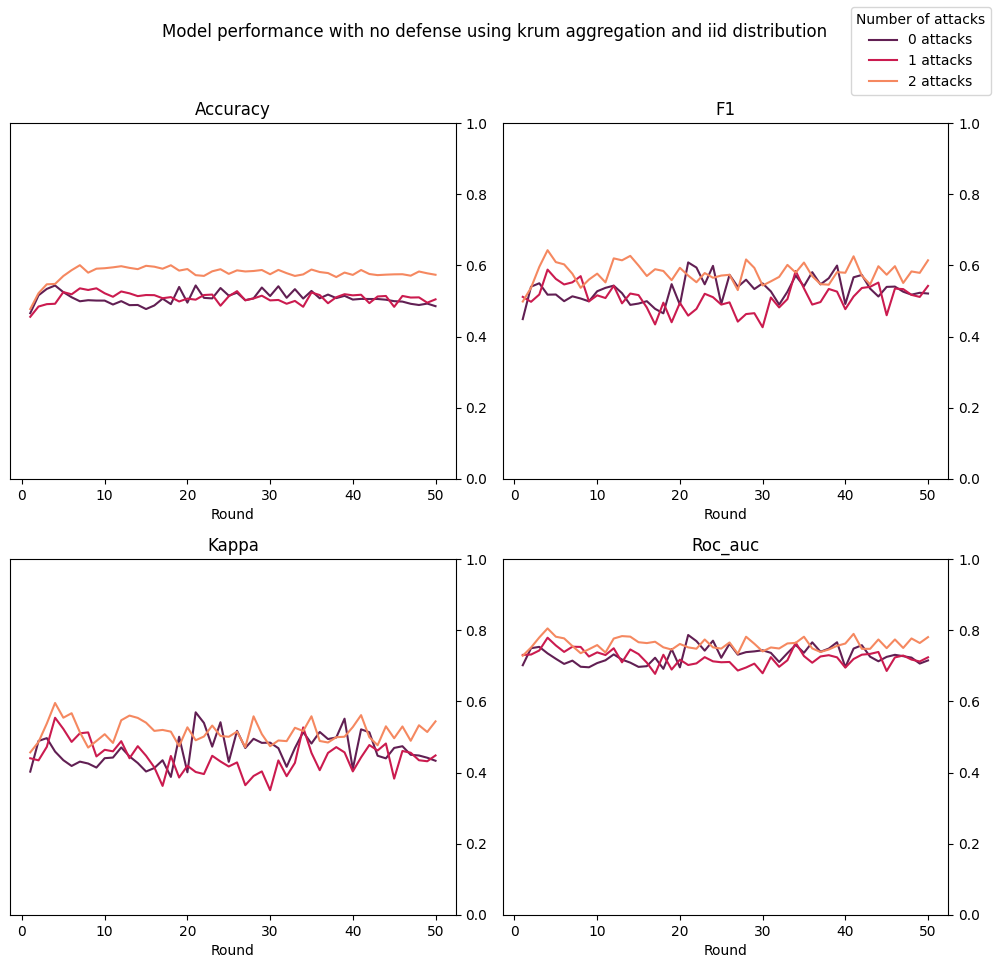

In [23]:
# Create a line plot with four lines    
config_base = 'logging/'
config_aggregate = "krum"
config_distribution = "iid"
defence = 0

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(f"Model performance with no defense using {config_aggregate} aggregation and {config_distribution} distribution", fontsize=12)

colors = sns.color_palette("rocket", 3)


for i, c in enumerate(configs):
    if c['aggregate'] == config_aggregate and c['dist'] == config_distribution and c['defense'] == defence:
        config_dir = config_base + str(i) + '/'
        data = get_stats(config_dir=config_dir, id=0)
        for data_key, ax in zip(data.keys(), axs.flat):
            ax.set_title(data_key.capitalize())
            ax.set_xlabel('Round')
            ax.set_ylim(0, 1)
            
            # Put y-axis on the right side
            ax.yaxis.tick_right()
        
            label = str(c['n_attack']) + ' attacks'
            sns.lineplot(x=range(1, len(data[data_key])+1), y=data[data_key], ax=ax, label=label, color=colors[c['n_attack']], legend=False)
            #annotate the last value

# Put the legend outside the plot, only unique labels
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', title='Number of attacks')

fig.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Save the plot
fig.savefig(f'figures/defence{defence}_{config_aggregate}_{config_distribution}.png')